## Import all Required Libraries

In [1]:
import pandas as pd
import numpy as np
from statistics import mean 
from matplotlib import pyplot

###  Calculate the median income of male employees and the median income of female employee in the population.

In [2]:
data=pd.read_csv('../Data/multipleChoiceResponses.csv')
b=pd.notnull(data["Q9"]) 
c=data[b]
cleaning = c[(c.Q1 != 'not available') & (c.Q1 != 'avalible if the person is ok to share') 
& (c.Q9 != 'I am not intrested to disclose my yearly compensation')]
datacleaned=cleaning[['Q1','Q9']][1:]
a=datacleaned.groupby('Q9') 
x1=a.get_group('0-10,000')
x2=a.get_group('10-20,000')
x3=a.get_group('20-30,000')
x4=a.get_group('30-40,000')
x5=a.get_group('40-50,000')
x6=a.get_group('50-60,000')
x7=a.get_group('60-70,000')
x8=a.get_group('70-80,000')
x9=a.get_group('80-90,000')
x10=a.get_group('90-100,000')
x11=a.get_group('100-125,000')
x12=a.get_group('125-150,000')
x13=a.get_group('150-200,000')
x14=a.get_group('200-250,000')
x15=a.get_group('250-300,000')
x16=a.get_group('300-400,000')
x17=a.get_group('400-500,000')
x18=a.get_group('500,000+')
count=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18], axis=0)
count1=count.groupby('Q1')['Q9']
class_male=count1.get_group('Male')
class_female=count1.get_group('Female')
male_new_index=class_male.reset_index()
female_new_index=class_female.reset_index()
male_end_value=male_new_index['Q9']
median_value_male=int((len(male_end_value)+1)/2)
male_median_finalvalue=male_end_value.iloc[median_value_male]
print(f"median Income of Male:{male_median_finalvalue}")
female_end_value=female_new_index['Q9']
median_value_female=int(len(female_end_value)/2)
female_median_finalvalue=female_end_value.iloc[median_value_female]
print(f"median Income of Female:{female_median_finalvalue}")  


C:\Users\16197\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


median Income of Male:30-40,000
median Income of Female:20-30,000


### Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population.(You create one histogram for male, and another histogram for female, but the two histograms will be displayedin the same graph with different colors).

<ipython-input-5-27e7c07356ee>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pyplot.hist(class_female, bins=16, alpha=0.5,edgecolor='Black', linewidth=1.5, label='Female', Color="Green")


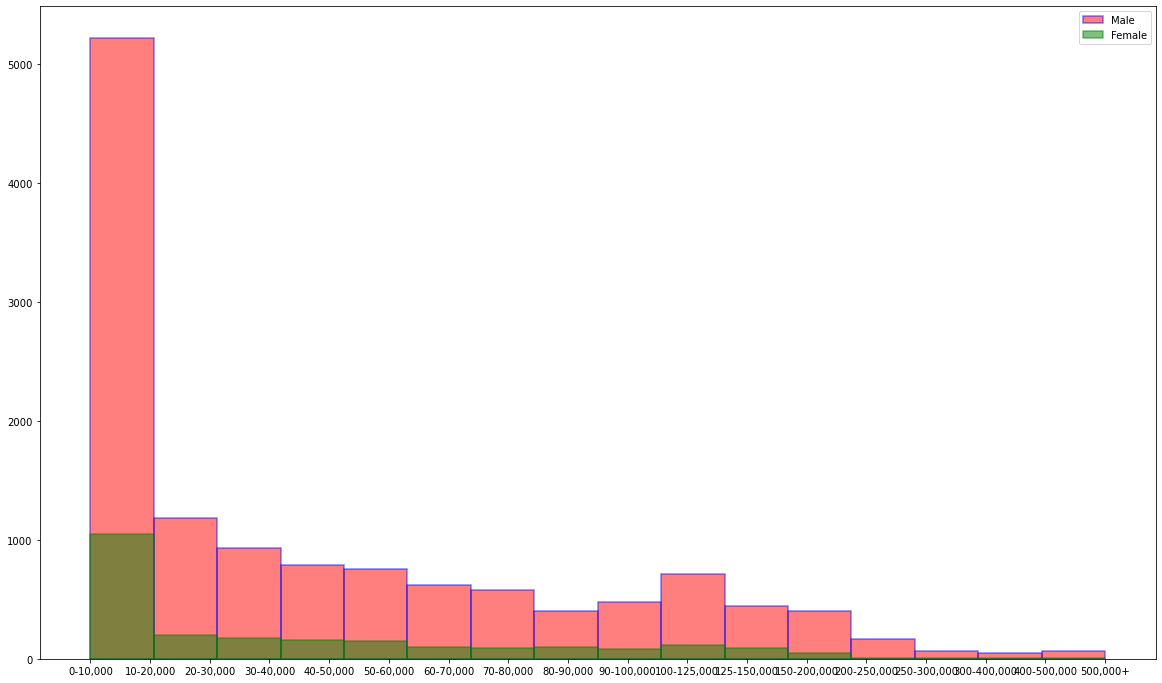

In [5]:
count=pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18],axis=0)
count1=count.groupby('Q1')['Q9']
class_male=count1.get_group('Male')
class_female=count1.get_group('Female')
fig=pyplot.figure(figsize=(20,12))
pyplot.hist(class_male, bins=16,alpha=0.5,edgecolor='Blue', linewidth=1.5, label='Male',color ="Red") 
pyplot.hist(class_female, bins=16, alpha=0.5,edgecolor='Black', linewidth=1.5, label='Female', Color="Green") 
pyplot.legend()

### Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well asA/B testing we discussed in the class to analyze the income gap between female and male employees.

### select a sample from the population. Make sure your sample include 500 employees selected from the pop-ulation, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees

In [6]:
split=datacleaned['Q9'].str.split('-').str[1]
one=split.str.split(',').str[0]
two=split.str.split(',').str[1]
datacleaned['data']=one+two  
index_male=datacleaned[datacleaned['Q1']=='Male'].index 
sample_male=np.random.choice(index_male,250,replace=False)
Male=datacleaned.loc[sample_male]
Female_index=datacleaned[datacleaned['Q1']=='Female'].index
sample_female=np.random.choice(Female_index,250,replace=False) 
Female=datacleaned.loc[sample_female]
sample_results=pd.concat([Male,Female],axis=0)
sample_results

,Q1,Q9,data
11576,Male,"60-70,000",70000
4626,Male,"40-50,000",50000
16679,Male,"40-50,000",50000
643,Male,I do not wish to disclose my approximate yearl...,NaN
12174,Male,I do not wish to disclose my approximate yearl...,NaN
...,...,...,...
4545,Female,"10-20,000",20000
3595,Female,"125-150,000",150000
16286,Female,I do not wish to disclose my approximate yearl...,NaN
22343,Female,"10-20,000",20000


### Define test statistic, null hypothesis and alternative hypothesis

### Null Hypothesis:There is no pay Gap between Male and Female Employees
### Alternative Hypothesis: There is a pay gap between Male and Female Employees

### Draw the income histogram for the sample, calculate the median income of the sample, and draw a reddot and a yellow dot of the female median income and male median income of the population, respectively,in the histogram

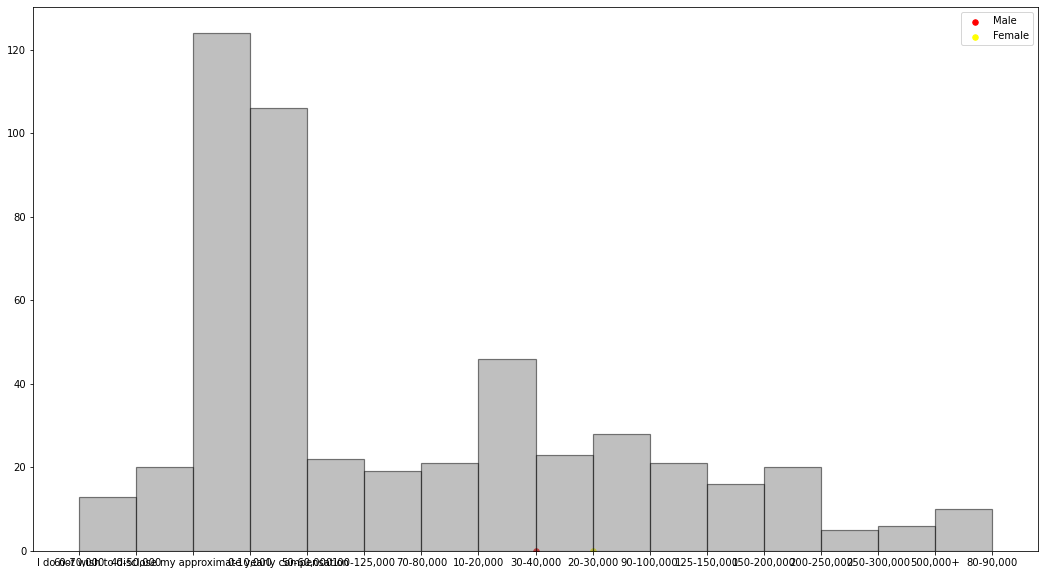

In [8]:
pyplot.figure(figsize=(18,10))
pyplot.hist(sample_results['Q9'],bins=16,alpha=0.5,edgecolor='black', linewidth=1.2, color= "Grey")
pyplot.scatter( male_median_finalvalue,0, color='red', s=30,label='Male') 
pyplot.scatter(female_median_finalvalue,0,color='yellow',s=30,label='Female') 
pyplot.legend()

### Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding teststatistic of the population (e.g. the difference of the median incomes between female and male employees)in the diagram 

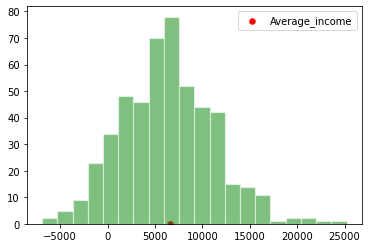

In [13]:
male_female_random=[]
c=data[b] 
cleaning = c[(c.Q1 != 'Prefer not to say') & (c.Q1 != 'Prefer to self-describe') 
& (c.Q9 != 'I do not wish to disclose my approximate yearly compensation')] 
datacleaned=cleaning[['Q1','Q9']][1:]
average_dictionary = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000,
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500,
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000,
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000,
       '500,000+':500000,'500,000':500000}
datacleaned['Avg_salary'] = datacleaned['Q9'].apply(lambda value: average_dictionary[value]) 
for temp in range(500):
    
    index_male=datacleaned[datacleaned['Q1']=='Male'].index 
    sample_male=np.random.choice(index_male,250,replace=False)
    Male=datacleaned.loc[sample_male]
    Male_data=Male['Avg_salary'].mean()  
    Female_index=datacleaned[datacleaned['Q1']=='Female'].index
    sample_female=np.random.choice(Female_index,250,replace=False)
    Female=datacleaned.loc[sample_female]
    Female_data=Female['Avg_salary'].mean() 
    male_female_random.append(Male_data-Female_data)
males_females=datacleaned.groupby('Q1')
average_male=males_females.get_group('Male')['Avg_salary'].mean()
average_female=males_females.get_group('Female')['Avg_salary'].mean()
difference_in_average_male_female=average_male-average_female 
pyplot.hist(male_female_random,bins=20,alpha=0.5,edgecolor='White', linewidth=1.2, color="Green") 
pyplot.scatter(difference_in_average_male_female,0,color='red', s=30,label='Average_income') 
pyplot.legend(loc='upper right')

### Write a procedure to use bootstrap to produce at least 5000 samples

The Mean of original data is between 3971.9892200597524 and 12345.582195150157


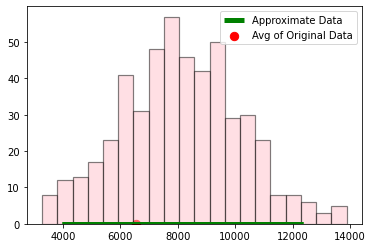

In [20]:
sample_for_bootstrap_Diff=[]
datacleaned['Avg_salary'] = datacleaned['Q9'].apply(lambda value: average_dictionary[value])  
sample_data=datacleaned.sample(5000,replace=False) 
sample_data=sample_data[['Q1','Avg_salary']]
for temp in range(500):
    sample_for_bootstrap=sample_data.sample(5000,replace=True) 
    sample_for_bootstrap_groupby=sample_for_bootstrap.groupby('Q1')
    bootrap_male_mean=sample_for_bootstrap_groupby.get_group('Male')['Avg_salary'].mean() 
    bootrap_female_mean=sample_for_bootstrap_groupby.get_group('Female')['Avg_salary'].mean() 
    sample_for_bootstrap_Diff.append(bootrap_male_mean-bootrap_female_mean)
sample_for_bootstrap_Diffs=pd.DataFrame(sample_for_bootstrap_Diff,columns=['Bootstrap_values'])
left_tale=sample_for_bootstrap_Diffs.Bootstrap_values.quantile(0.025) 
right_tale=sample_for_bootstrap_Diffs.Bootstrap_values.quantile(0.975) 
print(f"The Mean of original data is between {left_tale} and {right_tale}")
males_females=datacleaned.groupby('Q1')
average_male=males_females.get_group('Male')['Avg_salary'].mean() 
average_female=males_females.get_group('Female')['Avg_salary'].mean() 
difference_in_average_male_female=average_male-average_female
pyplot.hist(sample_for_bootstrap_Diff,bins=20,alpha=0.5,edgecolor='black', linewidth=1.2, color ="Pink") 
pyplot.hlines((0,0),left_tale,right_tale, colors='green', linestyles='solid',linewidth=5,label='Approximate Data') 
pyplot.scatter(difference_in_average_male_female,0,color='red',s=70,label='Avg of Original Data') 
pyplot.legend(loc='upper right')

### Draw the histogram of the test statistic of the bootstrap samples

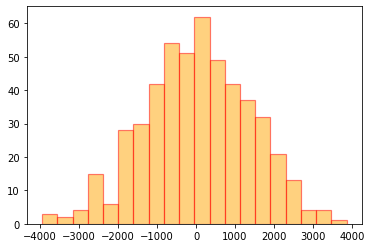

In [23]:
Shuffled_difference_in_mean=[]
clean_data=datacleaned[['Q1','Avg_salary']]
for shuff in range(500): 
    data_shuffle=clean_data.sample(len(clean_data),replace=False)['Q1'].reset_index()['Q1']
    frame = { 'shuffle_gender':data_shuffle } 
    result = pd.DataFrame(frame)
    clean1=clean_data['Q1'].reset_index()['Q1']
    clean2=clean_data['Avg_salary'].reset_index()['Avg_salary']
    result['Avg_salary']=clean2
    result['original_gender']=clean1
    shuffle_group=result.groupby('shuffle_gender')
    Shuffle_male_mean=shuffle_group.get_group('Male')['Avg_salary'].mean() 
    Shuffle_female_mean=shuffle_group.get_group('Female')['Avg_salary'].mean()
    Shuffled_difference_in_mean.append(Shuffle_male_mean-Shuffle_female_mean) 
males_females=datacleaned.groupby('Q1')
average_male=males_females.get_group('Male')['Avg_salary'].mean() 
average_female=males_females.get_group('Female')['Avg_salary'].mean() 
difference_in_average_male_female=average_male-average_female 
pyplot.hist(shuffles_mean_diff,bins=20,alpha=0.5,edgecolor='Red', linewidth=1.2, color='Orange')
shuffles_mean_diff=np.array(Shuffled_difference_in_mean)

### Define confidence interval and P-value to validate the hypothesis you defined

In [26]:
Shuffled_difference_in_mean=np.array(Shuffled_difference_in_mean)
P_value=np.count_nonzero(Shuffled_difference_in_mean <= difference_in_average_male_female ) / shuff 
print(f"P value : {P_value}")

P value : 1.002004008016032
